In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()


In [2]:
divorce = pd.read_csv("divorce.csv")
divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   divorce_date       2209 non-null   object 
 1   dob_man            2209 non-null   object 
 2   education_man      2205 non-null   object 
 3   income_man         2209 non-null   float64
 4   dob_woman          2209 non-null   object 
 5   education_woman    2209 non-null   object 
 6   income_woman       2209 non-null   float64
 7   marriage_date      2209 non-null   object 
 8   marriage_duration  2209 non-null   float64
 9   num_kids           1333 non-null   float64
dtypes: float64(4), object(6)
memory usage: 172.7+ KB


In [3]:
divorce.describe()

,income_man,income_woman,marriage_duration,num_kids
count,2209.000000,2209.000000,2209.000000,1333.000000
mean,7922.986410,6793.164545,9.606609,1.672918
std,7693.796497,6562.928689,7.266696,0.732858
min,3.000000,3.500000,1.000000,1.000000
25%,3600.000000,3000.000000,4.000000,1.000000
50%,6000.000000,5000.000000,8.000000,2.000000
75%,10000.000000,8000.000000,14.000000,2.000000
max,80000.000000,90000.000000,32.000000,5.000000


In [4]:
divorce.columns

Index(['divorce_date', 'dob_man', 'education_man', 'income_man', 'dob_woman',
       'education_woman', 'income_woman', 'marriage_date', 'marriage_duration',
       'num_kids'],
      dtype='object')

In [5]:
divorce.dtypes

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
dtype: object

In [6]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv('divorce.csv', parse_dates=['divorce_date','dob_man','dob_woman'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date                object
marriage_duration           float64
num_kids                    float64
dtype: object


In [7]:
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [8]:
divorce["marriage_year"] = divorce["marriage_date"].dt.year
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
marriage_year                 int32
dtype: object

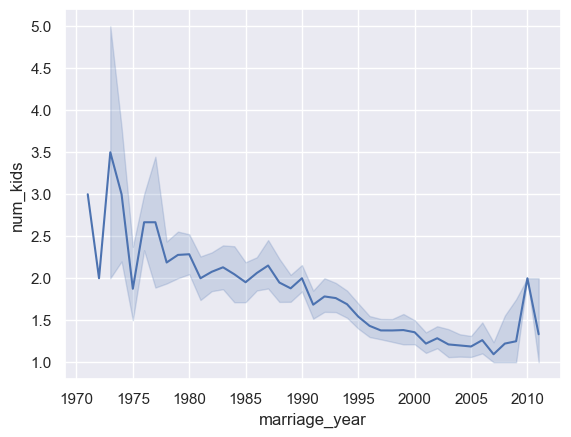

In [9]:
sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.show()

In [10]:
d_corr = divorce.corr(numeric_only=True)
d_corr

,income_man,income_woman,marriage_duration,num_kids,marriage_year
income_man,1.000000,0.318047,0.085321,0.040848,0.019170
income_woman,0.318047,1.000000,0.078677,-0.018015,0.026433
marriage_duration,0.085321,0.078677,1.000000,0.447358,-0.812469
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.461495
marriage_year,0.019170,0.026433,-0.812469,-0.461495,1.000000


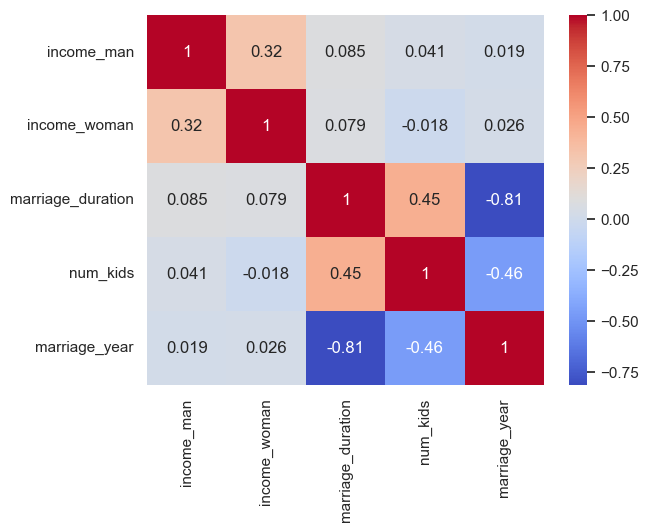

In [11]:
sns.heatmap(d_corr, annot=True, cmap="coolwarm")
plt.show()

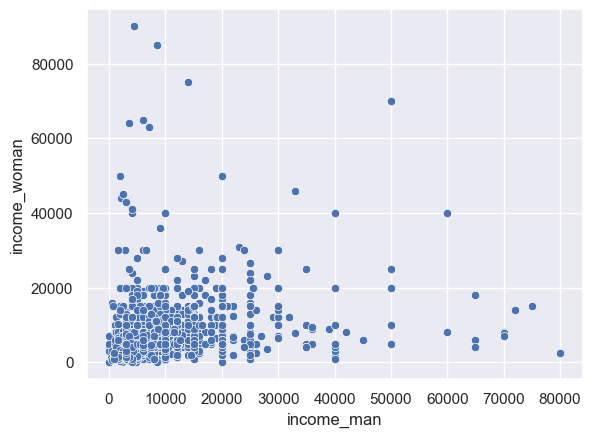

In [12]:
sns.scatterplot(data=divorce, x="income_man", y="income_woman")
plt.show()

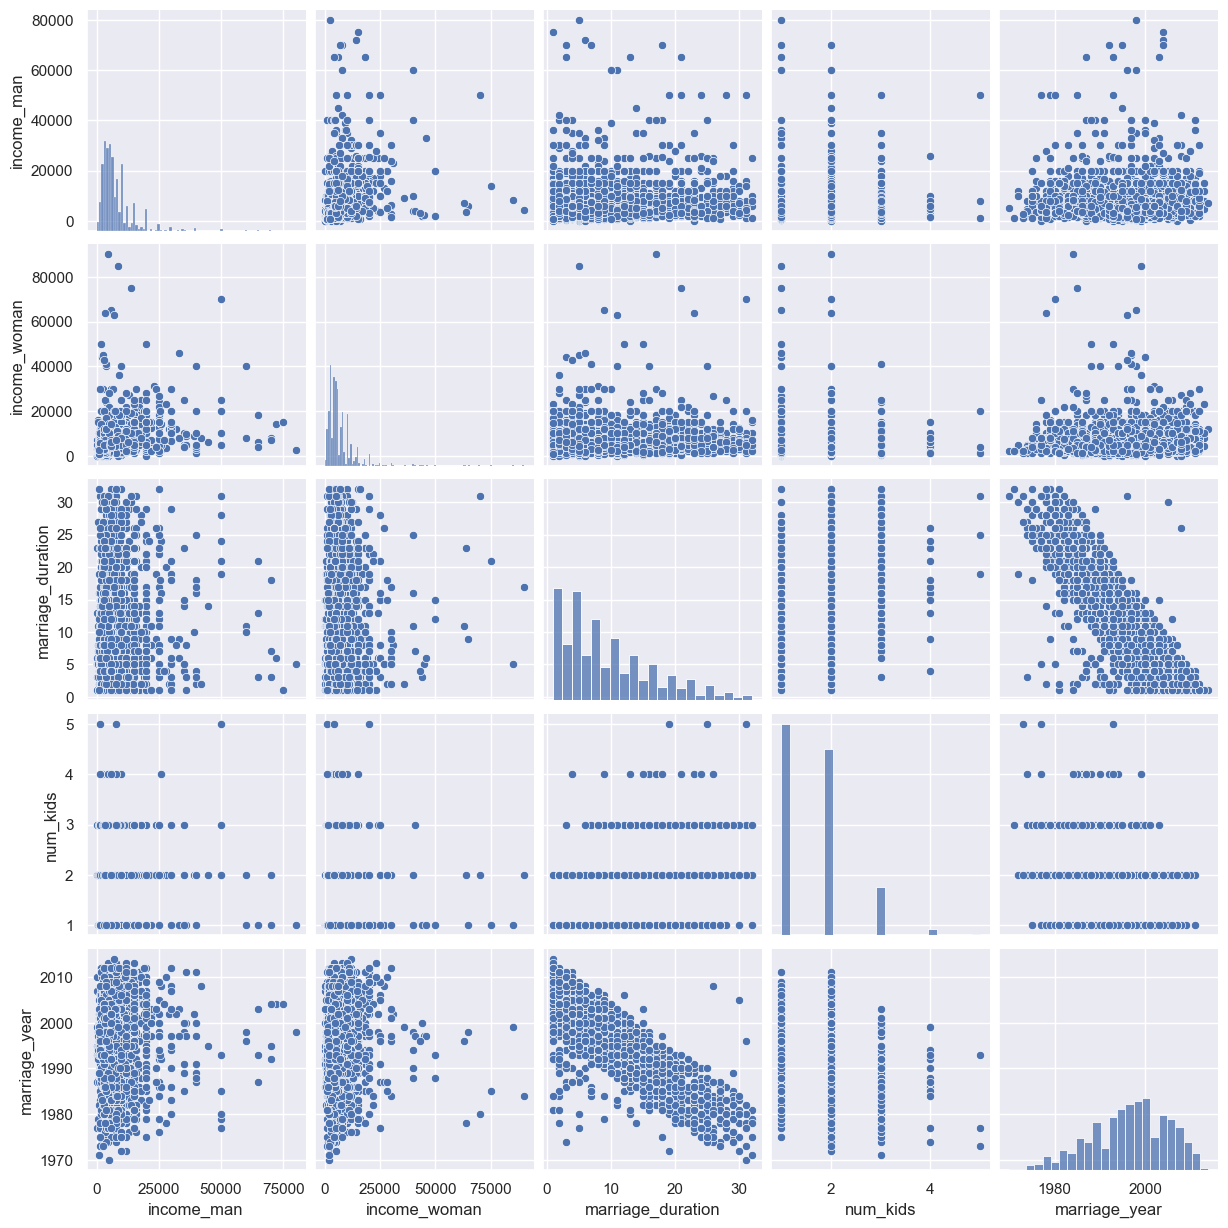

In [13]:
sns.pairplot(data=divorce)
plt.show()

In [14]:
divorce['man_age_marriage'] = divorce['marriage_year'] - divorce['dob_man'].dt.year
print(divorce[['man_age_marriage','marriage_year','dob_man']]) 

      man_age_marriage  marriage_year    dob_man
0                   25           2000 1975-12-18
1                   25           2001 1976-11-17
2                   31           2000 1969-04-06
3                   27           2006 1979-11-13
4                   25           2007 1982-09-20
...                ...            ...        ...
2204                33           2002 1969-11-27
2205                32           2002 1970-09-17
2206                33           2009 1976-03-11
2207                31           2008 1977-10-29
2208                49           2009 1960-06-22

[2209 rows x 3 columns]


In [15]:
divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year
print(divorce['woman_age_marriage'])

0       17
1       24
2       30
3       25
4       19
        ..
2204    27
2205    25
2206    31
2207    30
2208    37
Name: woman_age_marriage, Length: 2209, dtype: int32


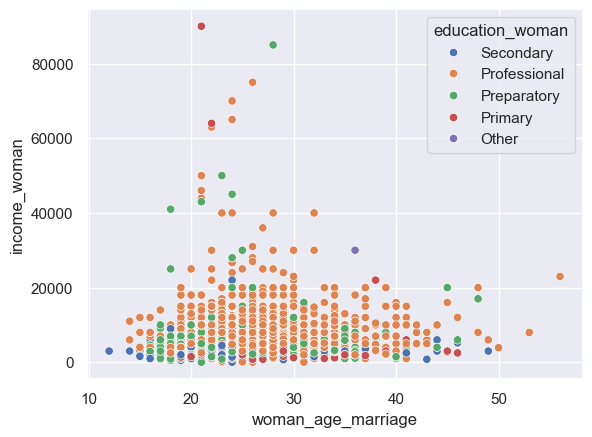

In [16]:
sns.scatterplot(data=divorce, x="woman_age_marriage", y="income_woman", hue="education_woman")
plt.show()

In [18]:
salaries = pd.read_csv("Salary_Rupee_USD.csv", index_col=0)
display(salaries.info())

<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          407 non-null    int64  
 1   Designation           407 non-null    object 
 2   Experience            407 non-null    object 
 3   Employment_Status     407 non-null    object 
 4   Salary_In_Rupees      407 non-null    float64
 5   Employee_Location     407 non-null    object 
 6   Company_Location      407 non-null    object 
 7   Company_Size          407 non-null    object 
 8   Remote_Working_Ratio  407 non-null    int64  
 9   Salary_USD            407 non-null    float64
 10  Job_Category          407 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 38.2+ KB


None

In [19]:
salaries["Job_Category"].value_counts(normalize=True)

Job_Category
Data Science        0.277641
Data Engineering    0.272727
Data Analytics      0.226044
Machine Learning    0.120393
Other               0.068796
Managerial          0.034398
Name: proportion, dtype: float64

In [20]:
pd.crosstab(salaries["Company_Size"], salaries["Experience"])

Experience,EN,EX,MI,SE
Company_Size,,,,
L,24,7,49,44
M,25,9,58,136
S,18,1,21,15
